<a href="https://colab.research.google.com/github/MaxVieiraSantiago/Machine-Learning-Projects-with-Python/blob/main/Weather_Forecasting_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weather Forecasting

### A previsão do tempo é a tarefa de prever as condições meteorológicas para um determinado local e tempo. Com o uso de dados e algoritmos meteorológicos, é possível prever as condições meteorológicas para os próximos n dias.

In [ ]:
from google.colab import drive
drive.mount( '/content/drive' )

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/MaxVieiraSantiago/Machine-Learning-Projects-with-Python/main/DailyDelhiClimateTrain.csv'
dados = pd.read_csv( url )

print( 'Cinco primeiras linhas do Dataset:')
print( dados.head() )

print( '\nInformações dos campos do Dataset:')
print( dados.info() )

print( '\nInformações da existência de valores nulos:')
print( dados.isnull().sum() )

print( '\nDescrição estatística dos dados:')
print( dados.describe() )

Cinco primeiras linhas do Dataset:
         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000

Informações dos campos do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None

Informações da existência de valores nulos:
date            0
meantemp        0
humidity   

### A coluna de data neste conjunto de dados não tem um tipo de dados datetime. Vamos alterá-lo quando necessário. Vamos dar uma olhada na temperatura média em Deli ao longo dos anos:

In [ ]:
fig = px.line( data_frame = dados,
               x = 'date',
               y = 'meantemp',
               title = 'Temperatura Média em Delhi ao longo dos Anos')
fig.show()

### Agora vamos dar uma olhada na umidade em Delhi ao longo dos anos:

In [ ]:
fig = px.line( data_frame = dados,
               x = 'date',
               y = 'humidity',
               title = 'Humidade em Delhi ao longo dos Anos')
fig.show()

### Agora vamos dar uma olhada na velocidade do vento em Deli ao longo dos anos:

In [ ]:
dados.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
fig = px.line( data_frame = dados,
               x = 'date',
               y = 'wind_speed',
               title = 'Velocidade do Vento em Delhi ao longo dos Anos')
fig.show()

### Até 2015, a velocidade do vento era maior durante as monções (agosto e setembro) e nas monções de recuo (dezembro e janeiro). Após 2015, não houve anomalias na velocidade do vento durante as monções. Agora vamos dar uma olhada na relação entre temperatura e umidade:

In [ ]:
fig = px.scatter( data_frame = dados,
                  x = 'humidity',
                  y = 'meantemp',
                  size = 'meantemp',
                  trendline='ols',
                  title = 'Relação entre Temperatura e Umidade')
fig.show()

### Há uma correlação negativa entre temperatura e umidade em Delhi. Isso significa que temperaturas mais altas resultam em baixa umidade e temperaturas mais baixas resultam em alta umidade.

# Analisando a Mudança de Temperatura

## Agora vamos analisar a mudança de temperatura em Delhi ao longo dos anos. Para esta tarefa, primeiro converteremos o tipo de dados da coluna de data em data e hora. Em seguida, adicionaremos duas novas colunas no conjunto de dados para valores de ano e mês.

In [ ]:
dados['date'] = pd.to_datetime( dados['date'], format = '%Y-%m-%d')
dados['year'] = dados['date'].dt.year
dados['month'] = dados['date'].dt.month

dados.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1


### Agora vamos dar uma olhada na mudança de temperatura em Delhi ao longo dos anos:

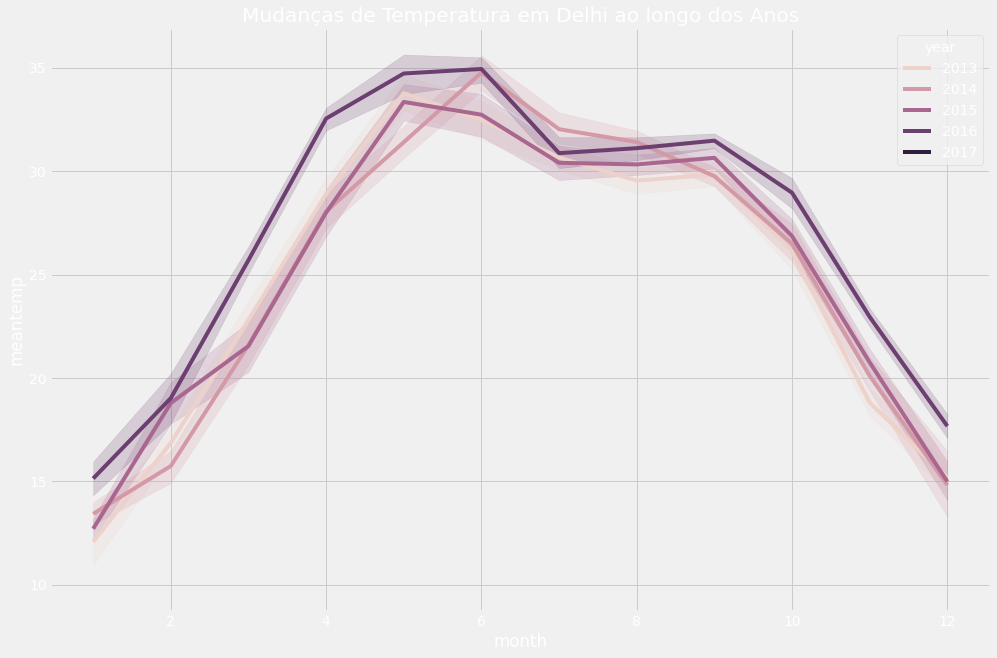

In [ ]:
plt.style.use( 'fivethirtyeight' )
plt.figure( figsize = (15,10) )
sns.lineplot( data = dados, x = 'month', y = 'meantemp', hue='year')
plt.title( 'Mudanças de Temperatura em Delhi ao longo dos Anos')

plt.show()

# **Previsão do tempo usando Python**

## Agora vamos passar para a tarefa de previsão do tempo. Estaremos usando o modelo de profeta do Facebook para esta tarefa. O modelo do profeta do Facebook é uma das melhores técnicas para previsão de séries temporais. Se você nunca usou este modelo antes, pode instalá-lo em seu sistema usando o comando mencionado abaixo em seu prompt de comando ou terminal:

In [ ]:
!pip install prophet

### O modelo do profeta aceita dados de tempo nomeados como “ds” e rotulados como “y”. Então, vamos converter os dados para este formato:

In [ ]:
forecast_dados = dados.rename( columns = {'date':'ds', 'meantemp':'y'})

forecast_dados.tail()

,ds,y,humidity,wind_speed,meanpressure,year,month
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,2016,12
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,2016,12
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,2016,12
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000,2016,12
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000,2017,1


## Agora, abaixo está como podemos usar o modelo de profeta do Facebook para previsão do tempo usando Python:

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

modelo = Prophet()
modelo.fit( forecast_dados )

forecasts = modelo.make_future_dataframe( periods = 365 )
predicoes = modelo.predict( forecasts )

plot_plotly( modelo, predicoes )


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8t6fiqj2/e6tfu4cm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8t6fiqj2/10_nhzvr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47200', 'data', 'file=/tmp/tmp8t6fiqj2/e6tfu4cm.json', 'init=/tmp/tmp8t6fiqj2/10_nhzvr.json', 'output', 'file=/tmp/tmp8t6fiqj2/prophet_modeleqjxkxba/prophet_model-20230222110731.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:07:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:07:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
